# Log

**26 July** : 
* Added :
    * Methods : tdc(), bb84(), cipher() to Links. bb84() returns a key, cipher() encrypts the key and passes the ciphertext to tdc()
    * Variables : KEY_RESERVOIR to Links.

* Need to add :
    * Methods : extract_key() to Links. To extract a key of required length from the KEY_RESERVOIR
    * Variables : Need to add 'text' to CRs. This will store the data to be sent after encryption
    * Files : Need to add iterated_bb84 -> Qiskit_rebuilt_4 -> Hamming files

# Assembled

This is a systematicically assembled file to perform the entire task. Various other files have been called as required to utilize their functionality.

Here, we define the edge data for the graph(NSFNET, Six-Node), followed by creating the graph by invoking a function from another file. The parameters required are defined here, including the X range and k. Then the file 'QKRA' is invoked to perform RWTA.

Following this, the average is calculated from all the runs of QKRA, and the value is plotted.

# Preamble

In [1]:
import numpy as np
import random
import math
import networkx as nx
import matplotlib.pyplot as plt
import os
import time

In [2]:
# Define the subdirectory name for storing figures
fig_subdirectory = "Figures"
if not os.path.exists(fig_subdirectory):    # Check if the subdirectory exists
    os.makedirs(fig_subdirectory)
    
# For writing data
data_subdirectory = "Data"
if not os.path.exists(data_subdirectory):
    os.makedirs(data_subdirectory)

# Setting the precision for floating points :
np.set_printoptions(precision=4)

# Loading dependencies

In [3]:
#Running the files in the same directory to gain access to methods

%run ./Generate_Network_Topology.ipynb

%run ./Generating_CRs.ipynb 

%run ./Links.ipynb

# Given

In [1]:
# 21 Edges in NSFNET
nsfnet = [ (1, 2, 1100),  #Edge between Node 0 and Node 1
             (2, 3, 1600), #Intermediate Edge between Node 1 and Node 2
             (1, 3, 600), # Edge between Node 0 and Node 2
             (2, 8, 1500), # Edge between Node 1 and Node 7
             (1, 4, 1000),  # Edge between Node 0 and Node 3
             
         (4, 5, 600), # Edge between Node 3 and Node 4
             (5, 7, 800), # Intermediate edge between Node 4 and Node 6
             (7, 8, 700), # Intermediate edge between Node 6 and Node 7
             (10, 11, 900), # Edge Betweeen Node 9 and Node 10
             (4, 9, 1500), # Edge Betweeen Node 3 and Node 8
         
         (9, 12, 800), # Edge Betweeen Node 8 and Node 11
             (8, 10, 700), # Edge Betweeen Node 7 and Node 9
             (10, 12, 500), # Edge Betweeen Node 9 and Node 11
             (9, 14, 800), # Edge Betweeen Node 8 and Node 13
             (10, 14, 500), # Edge Betweeen Node 9 and Node 13
         
         (12, 13, 300), # Edge Betweeen Node 11 and Node 12
             (13, 14, 300), # Edge Betweeen Node 12 and Node 13
             (3, 6, 1000), # Edge Betweeen Node 2 and Node 5
             (6, 5, 1100), # Edge Betweeen Node 5 and Node 4
             (6, 13, 2000), # Edge Betweeen Node 5 and Node 12
         
         (6, 11, 1200), # Edge Betweeen Node 5 and Node 10
        ]


six_nodes = [ 
             (5, 0, 1200), # Edge between Node 5 and Node 0
             (0, 1, 1200), # Edge between Node 0 and Node 1
             (1, 2, 800), # Edge between Node 1 and Node 2
             (2, 3, 900), # Edge between Node 2 and Node 3
             (3, 4, 1000), # Edge between Node 3 and Node 4
             (4, 5, 900), # Edge between Node 4 and Node 5
             (0, 4, 1000), # Intermediate edge between Node 0 and Node 4
             (1, 3, 1000) # Intermediate edge between Node 1 and Node 3
            
    ]

six_nodes
six_nodes = [ (u+1, v+1, w) for (u, v, w) in six_nodes ]    # Increasing the node value by one, so that it starts with 1

In [5]:
print(Links.channel_ts)
print(Links.n_ts)

{1: 8, 2: 10, 3: 12}
{'tdc': 47, 'high': 8, 'medium': 10, 'low': 12}


# Execution

Number of Nodes:  6
Number of Links : 16


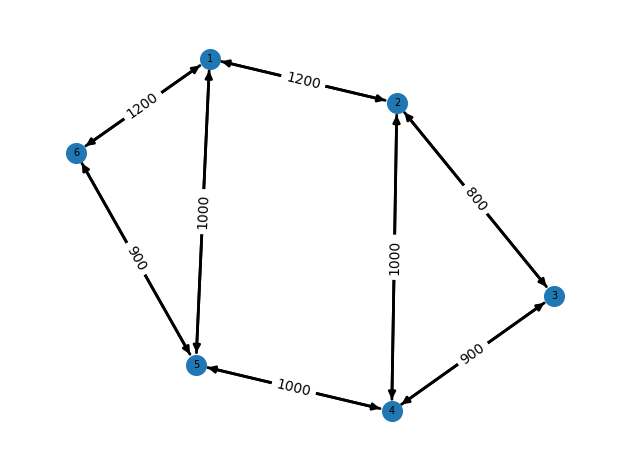

Running QKRA-AWSL for numCR = 25 with j_range = 34(factor = 25), k = 3, iterations = 1

All CRs for X = 25 dealt with :
The Success rate of connection requests(SRCR) is : 1.0
The NSP of the network is : 101
The time-slot utilization ratio(TUR) is :  [0.09375, 0.140625, 0.0875, 0.06770833333333333]

All CRs for X = 50 dealt with :
The Success rate of connection requests(SRCR) is : 1.0
The NSP of the network is : 198
The time-slot utilization ratio(TUR) is :  [0.1625, 0.171875, 0.1625, 0.15625]

All CRs for X = 75 dealt with :
The Success rate of connection requests(SRCR) is : 1.0
The NSP of the network is : 300
The time-slot utilization ratio(TUR) is :  [0.23125, 0.28125, 0.23125, 0.19791666666666666]

All CRs for X = 100 dealt with :
The Success rate of connection requests(SRCR) is : 1.0
The NSP of the network is : 401
The time-slot utilization ratio(TUR) is :  [0.3104166666666667, 0.4140625, 0.3125, 0.23958333333333334]

All CRs for X = 125 dealt with :
The Success rate of connection 

In [7]:
#%%capture    # To silent the output
start_time = time.time()

edges = six_nodes    # Choosing the network topology : [nsfnet, six_nodes]
topology = 'six_nodes'
dir_edges = edges + [(v, u, w) for (u, v, w) in edges]    # For bidirectional edges

# Creating the network topology(graph)
g = create_bi_topology(dir_edges) 
numNodes = len(g)


# Set the ASLC : ['ASSL', 'AWSL', SSL']
aslc = "AWSL"


# Modify: numCR, k, num_iter, j_range, factor
numCR = 25         # Number of initial CRs    #numCR = int(input("Input the number of CRs to be generated initially"))
k = 3              # Given parameter
num_iter = 1       # Average over
j_range = 34       # X steps
factor = 25        # Step multiplication factor. 10 if X>=100    #factor = int(input("Input step size :))


# Initializing the arrays to store data of j_range X for num_iter
srcr = np.zeros([num_iter, j_range])
tur = np.zeros([num_iter, j_range])
nsp = np.zeros([num_iter, j_range]).astype(int)


# Open the file to write data to
filename = f"QKRA-{aslc}({topology}).txt"
data_path = os.path.join(data_subdirectory, filename)
file = open(data_path, "a")
file.write(f"\n\nQKRA-{aslc}: {topology=}, k = {k}, Averaged over(z) = {num_iter} : \n")


print(f"Running QKRA-{aslc} for numCR = {numCR} with j_range = {j_range}(factor = {factor}), k = {k}, iterations = {num_iter}") 
# Loop to average over the same list of X
for z in range(num_iter):    
    
    X = numCR    # Initial value of X
    j = 0    
    
    %run ./QKRA.ipynb    # Calling another file to allocate the resources

    print(f"\nIteration {z+1} complete")
    print("#########################################################################################################################################\n")
##
print("Simulation Ended")


end_time = time.time()

# Calculation

In [8]:
# Calculating the time taken by simulation

elapsed_time = f"{int((end_time - start_time)/3600)}h {int((end_time - start_time)/60 % 60)}m {(end_time - start_time)%60 : .2f}s"
print(f"Elapsed Time : {elapsed_time}")

Elapsed Time : 0h 0m  6.49s


In [9]:
X_range = np.array(range(numCR, (j_range + 1)*factor, factor))

# Initializing arrays to calculate the averages
avg_srcr = np.zeros(j_range)
avg_tur = np.zeros(j_range)
avg_nsp = np.zeros(j_range)

for j in range(j_range):    # For different values of X
    for i in range(num_iter):    # Summing over num_iter(=100)
        avg_srcr[j] += srcr[i, j] 
        avg_tur[j] += tur[i, j] 
        avg_nsp[j] += nsp[i, j] 

avg_srcr /= num_iter
avg_tur /= num_iter 
avg_nsp /= num_iter

for j in range(j_range):
    avg_srcr[j] = round(avg_srcr[j], 4)
    avg_tur[j] = round(avg_tur[j], 4) 
    avg_nsp[j] = round(avg_nsp[j], 4) 

file.write(f"\nX_range = [{', '.join(map(str, X_range))}] \nAverage_SRCR_{aslc} = [{', '.join(map(str, avg_srcr))}] \nAverage_TUR_{aslc} = [{', '.join(map(str, avg_tur))}] \nAverage_NSP_{aslc} = [{', '.join(map(str, avg_nsp))}]\n")
file.close()

# Display Data

In [10]:
print(f"Average SRCR : {avg_srcr}, \nAverage TUR : {avg_tur}, \nAverage NSP : {avg_nsp}, \nX : {X_range}")

Average SRCR : [1.     1.     1.     1.     1.     0.9933 0.9829 0.98   0.9022 0.844
 0.8    0.7867 0.7538 0.7114 0.7093 0.7125 0.6518 0.66   0.6547 0.576
 0.5905 0.5345 0.5374 0.515  0.488  0.4892 0.4844 0.4243 0.4386 0.396
 0.3819 0.3825 0.3976 0.3682], 
Average TUR : [0.0938 0.1625 0.2312 0.3104 0.375  0.5146 0.5521 0.6354 0.6438 0.7125
 0.7167 0.7333 0.7646 0.7979 0.8354 0.8812 0.8625 0.9062 0.925  0.9146
 0.9396 0.9354 0.9583 0.9667 0.9688 0.9875 0.9771 0.9521 0.9833 0.9688
 0.9875 0.975  0.9958 1.    ], 
Average NSP : [ 101.  198.  300.  401.  497.  574.  676.  771.  789.  814.  857.  913.
  953.  979. 1044. 1121. 1091. 1171. 1219. 1145. 1225. 1162. 1224. 1226.
 1213. 1265. 1297. 1202. 1265. 1188. 1189. 1224. 1306. 1259.], 
X : [ 25  50  75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450
 475 500 525 550 575 600 625 650 675 700 725 750 775 800 825 850]


# Plotting

Plot 1 : SRCR and TUR

Plot2 : NSP

In [11]:
# X
# X_i = 600
# X_f = 850

In [12]:
# Setting the initial and final X for the plot
X_i = 25
X_f = X_range[-1]
X_f

850

In [13]:
j_X_i = int(X_i/25 - 1)
j_X_f = int(X_f/25 - 1)
print(f"Plotting for X = {X_i}(j = {j_X_i}) to X = X_f(j = {j_X_f})")

Plotting for X = 25(j = 0) to X = X_f(j = 33)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


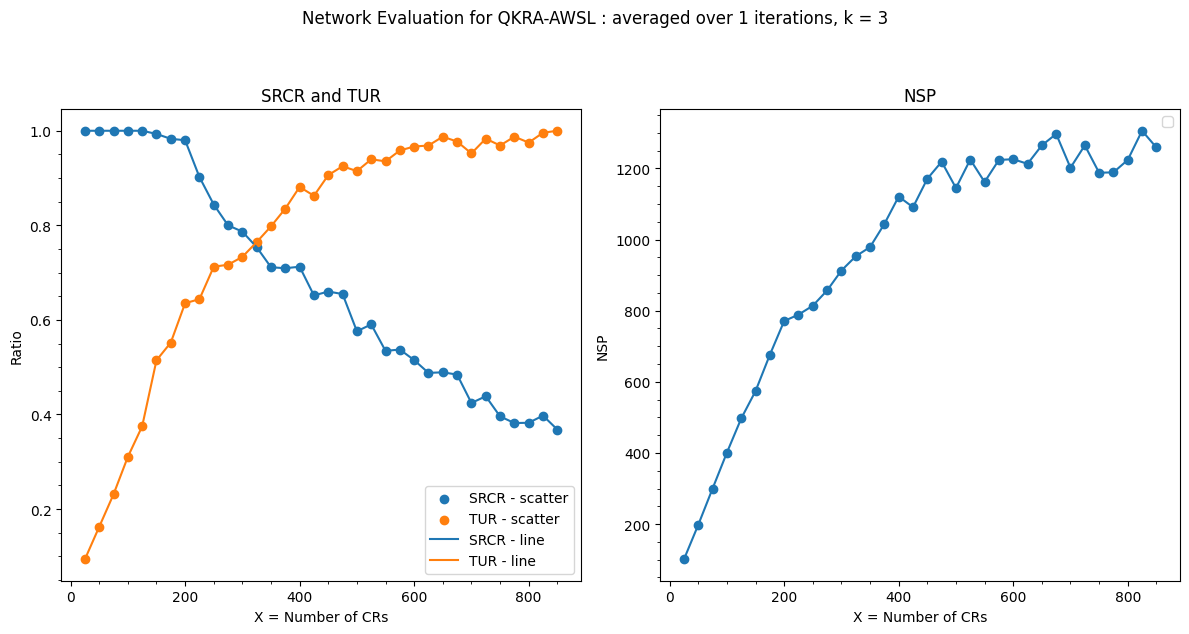

AWSL - z = 1, k = 3 for X - 25 to 850.jpeg


In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))    # 1 column for SRCR and TUR, another for NSP

ax1.scatter(X_range[j_X_i:j_X_f+1], avg_srcr[j_X_i:j_X_f+1], label='SRCR - scatter') 
ax1.scatter(X_range[j_X_i:j_X_f+1], avg_tur[j_X_i:j_X_f+1], label='TUR - scatter')
ax2.scatter(X_range[j_X_i:j_X_f+1], avg_nsp[j_X_i:j_X_f+1])

ax1.plot(X_range[j_X_i:j_X_f+1], avg_srcr[j_X_i:j_X_f+1], label='SRCR - line')
ax1.plot(X_range[j_X_i:j_X_f+1], avg_tur[j_X_i:j_X_f+1], label='TUR - line')
ax2.plot(X_range[j_X_i:j_X_f+1], avg_nsp[j_X_i:j_X_f+1])


ax1.set_xlabel('X = Number of CRs')
ax1.set_ylabel('Ratio')
ax1.set_title("SRCR and TUR")
ax1.minorticks_on()
ax1.legend(loc='best')

ax2.set_xlabel('X = Number of CRs')
ax2.set_ylabel('NSP')
ax2.set_title("NSP")
ax2.minorticks_on()
ax2.legend(loc='best')

fig.suptitle(f"Network Evaluation for QKRA-{aslc} : averaged over {num_iter} iterations, k = {k}", y=1.05)  # Place title above subplots
#fig.legend(loc='best')

# Show the plot
plt.tight_layout()  # Adjust spacing between subplots
plt.show()


# Saving the plot
filename = (f"{aslc} - z = {num_iter}, k = {k} for X - {X_range[j_X_i]} to {X_range[j_X_f]}.jpeg")
print(filename)

# Combine the subdirectory and filename to create the full path
fig_path = os.path.join(fig_subdirectory, filename)
plt.savefig(fig_path, dpi=300, bbox_inches='tight')